In [1]:
import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
user = pd.read_csv('user_table.csv', parse_dates=['date'])
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [5]:
home = pd.read_csv('home_page_table.csv')
home.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [6]:
search = pd.read_csv('search_page_table.csv')
search.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [7]:
payment = pd.read_csv('payment_page_table.csv')
payment.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [8]:
confirm = pd.read_csv('payment_confirmation_table.csv')
confirm.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [12]:
data = pd.merge(left=user, right=home, how='left', on='user_id')
data = pd.merge(left=data, right=search, how='left', on='user_id', suffixes=('_home', '_search'))
data = pd.merge(left=data, right=payment, how='left', on='user_id')
data = pd.merge(left=data, right=confirm, how='left', on='user_id', suffixes=('_payment', '_confirmation'))
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [19]:
len(data)

90400

In [23]:
data.isnull().sum()

user_id                  0
date                     0
device                   0
sex                      0
page_home                0
page_search          45200
page_payment         84370
page_confirmation    89948
dtype: int64

In [37]:
features = ['page_home','page_search','page_payment','page_confirmation']

In [38]:
convertion_rate = 1-(data[features].isnull().sum()/len(data))

In [55]:
convertion_rate

page_home            1.000000
page_search          0.500000
page_payment         0.066704
page_confirmation    0.005000
dtype: float64

In [58]:
cr = dict(convertion_rate)

In [59]:
cr

{'page_home': 1.0,
 'page_search': 0.5,
 'page_payment': 0.0667035398230088,
 'page_confirmation': 0.0050000000000000044}

# Overall convertion rate

([<matplotlib.axis.XTick at 0x20139dff7b8>,
 <a list of 4 Text xticklabel objects>)

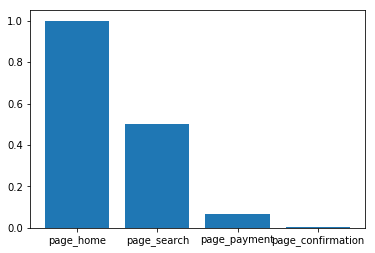

In [69]:
plt.bar(range(len(cr)), list(cr.values()), align='center')
plt.xticks(range(len(cr)), list(cr.keys()))

In [67]:
# by data['device']
# by data['sex']

# Convertion rate by data['device']

In [72]:
data['device'].unique()

array(['Desktop', 'Mobile'], dtype=object)

([<matplotlib.axis.XTick at 0x2013c9367f0>,
 <a list of 4 Text xticklabel objects>)

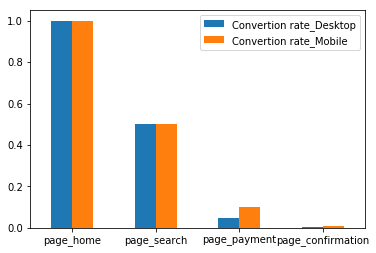

In [119]:
data_Desktop = data[data['device'] == 'Desktop']
data_Mobile = data[data['device'] == 'Mobile']

convertion_rate__Desktop = 1-(data_Desktop[features].isnull().sum()/len(data_Desktop))
convertion_rate__Mobile = 1-(data_Mobile[features].isnull().sum()/len(data_Mobile))

convertion_rate__Desktop = pd.DataFrame(convertion_rate__Desktop.items(), columns=['Page', 'Convertion rate_Desktop'])
convertion_rate_Mobile = pd.DataFrame(convertion_rate__Mobile.items(), columns=['Page', 'Convertion rate_Mobile'])

convertion_rate_device_data = pd.merge(left=convertion_rate__Desktop, right=convertion_rate_Mobile, how='left', on='Page')

ax = convertion_rate_device_data.plot.bar(rot=0)
plt.xticks(range(len(convertion_rate_device_data)), list(convertion_rate_device_data['Page']))

# Convertion rate by data['sex']

In [73]:
data['sex'].unique()

array(['Female', 'Male'], dtype=object)

([<matplotlib.axis.XTick at 0x2013c9ada90>,
 <a list of 4 Text xticklabel objects>)

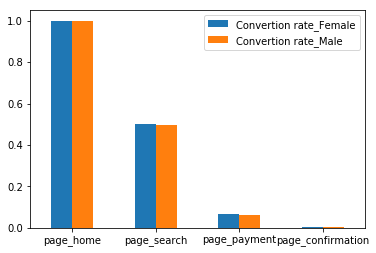

In [120]:
data_F = data[data['sex'] == 'Female']
data_M = data[data['sex'] == 'Male']

convertion_rate__F = 1-(data_F[features].isnull().sum()/len(data_F))
convertion_rate__M = 1-(data_M[features].isnull().sum()/len(data_M))

convertion_rate__F = pd.DataFrame(convertion_rate__F.items(), columns=['Page', 'Convertion rate_Female'])
convertion_rate_M = pd.DataFrame(convertion_rate__M.items(), columns=['Page', 'Convertion rate_Male'])

convertion_rate_SEX_data = pd.merge(left=convertion_rate__F, right=convertion_rate_M, how='left', on='Page')

ax = convertion_rate_SEX_data.plot.bar(rot=0)
plt.xticks(range(len(convertion_rate_SEX_data)), list(convertion_rate_SEX_data['Page']))